In [3]:
import os

import pandas as pd

from utils import analysis_utils as au
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
from skimage.feature import blob_log, blob_dog, blob_doh
from sklearn.neighbors import KDTree
from tqdm.notebook import  tqdm, trange
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_triangle, threshold_yen, threshold_li, threshold_isodata, \
    threshold_mean, threshold_minimum, threshold_multiotsu
from skimage.filters import gaussian
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
from skimage.feature import blob_log, blob_dog, blob_doh
from sklearn.neighbors import KDTree
import seaborn as sns


In [6]:
img = tifffile.imread(r'C:\Users\amityu\Gel_Drop_Data\ex1-ann\exp100751.tif')

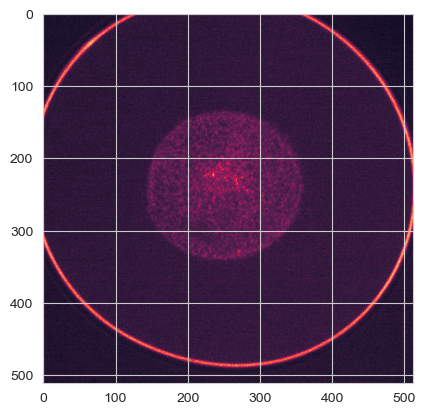

In [9]:
plt.imshow(gaussian(img, sigma =0))
plt.show()

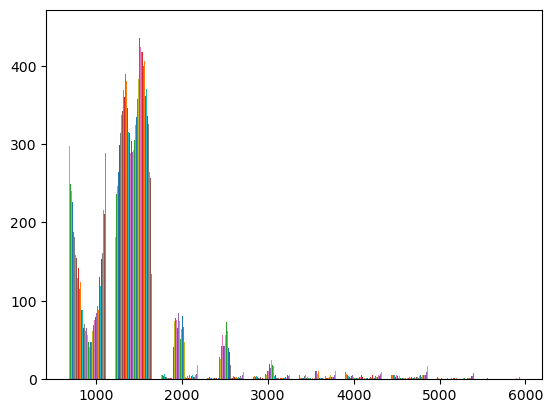

In [22]:
plt.hist(img)
plt.show()

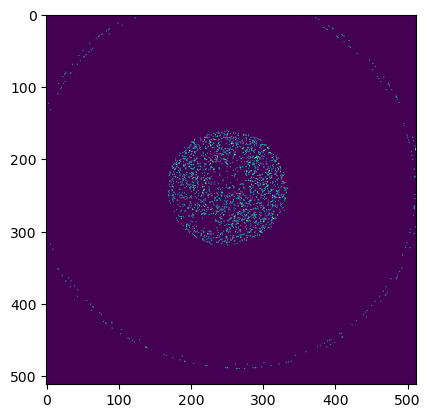

In [33]:
threshold = 2200
img2 = np.bitwise_and(img>threshold, img < threshold +100) 
plt.imshow(img2)
plt.show()

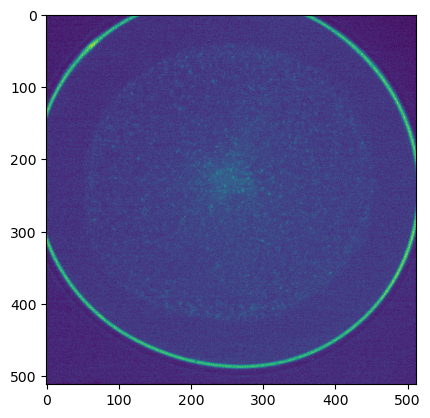

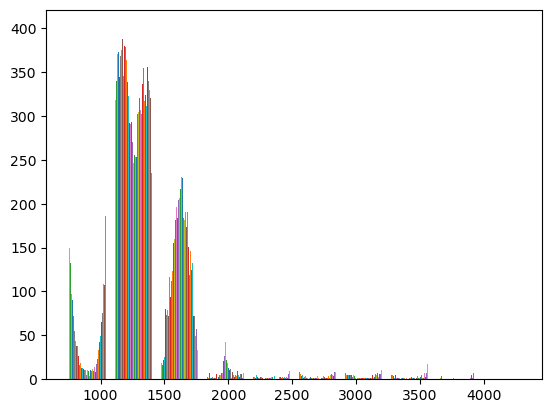

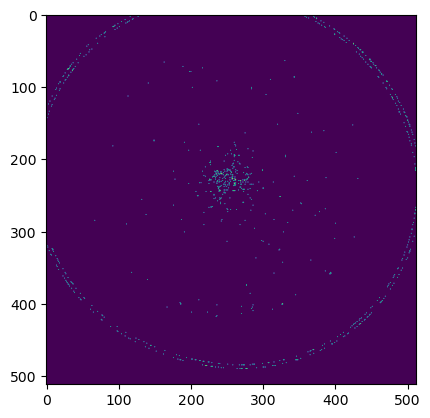

In [37]:
img = tifffile.imread(r'C:\Users\amityu\Gel_Drop_Data\ex1-ann\exp100500.tif')
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(img)
plt.show()
plt.hist(img)
plt.show()
threshold = 2000
img2 = np.bitwise_and(img > threshold, img < threshold + 155)
plt.imshow(img2)
plt.show()

In [53]:
img = tifffile.imread(r'C:\Users\amityu\Gel_Drop_Data\tif_centered\first_centered000743.tif')
gaussian_sigma =3
im = img_as_float(img)
image_gaussian = gaussian(im, sigma = gaussian_sigma)
# Comparison between image_max and im to find the coordinates of local maxima
coordinates = blob_log(image_gaussian, min_sigma=0.3, max_sigma=2)#, threshold=None)#, min_sigma=0, max_sigma=40)

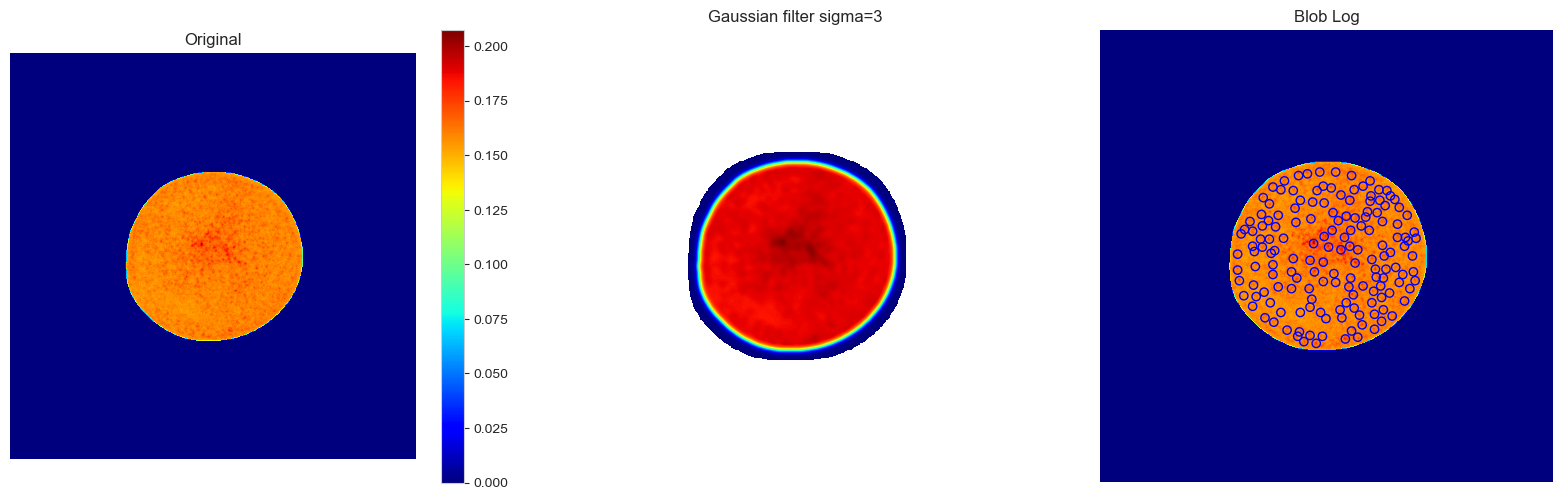

In [61]:

# display results
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
ax = axes.ravel()
cax = ax[0].imshow(im, cmap='jet')
ax[0].axis('off')
ax[0].set_title('Original')
fig.colorbar(cax)
image_gaussian_no_nan = image_gaussian
image_gaussian_no_nan[image_gaussian_no_nan==0] = np.nan
ax[1].imshow(image_gaussian_no_nan, cmap='jet')
ax[1].axis('off')
ax[1].set_title('Gaussian filter sigma={}'.format(gaussian_sigma))

ax[2].imshow(im, cmap=plt.cm.jet)
ax[2].autoscale(False)
#ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'bo')
ax[2].scatter(coordinates[:, 1], coordinates[:, 0], facecolors='none', edgecolors='b')
ax[2].axis('off')
ax[2].set_title('Blob Log')

fig.tight_layout()

plt.show()

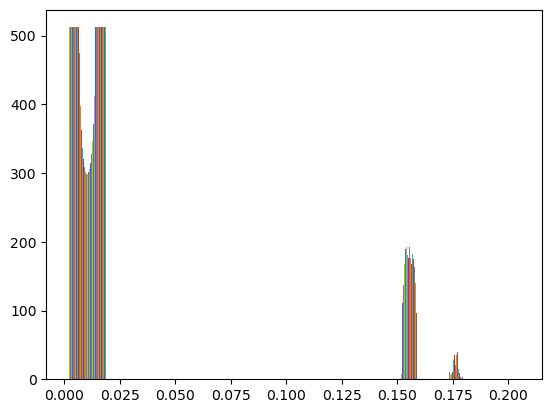

In [64]:
plt.hist(im)
plt.show()

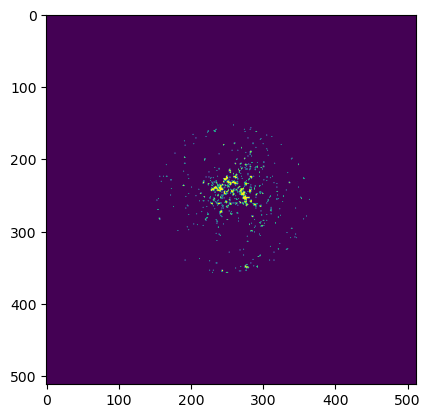

In [79]:
threshold = 0.17
img2 = np.bitwise_and(im > threshold, True)#img < threshold + 155)
plt.imshow(img2)
plt.show()

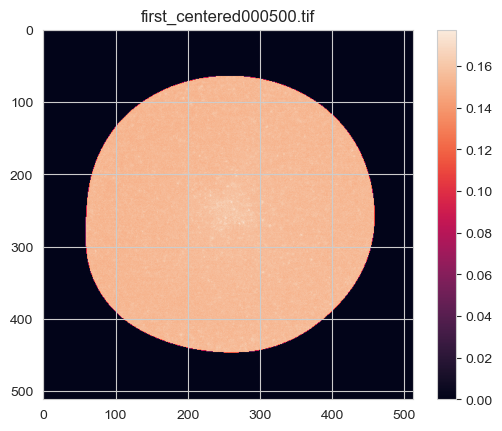

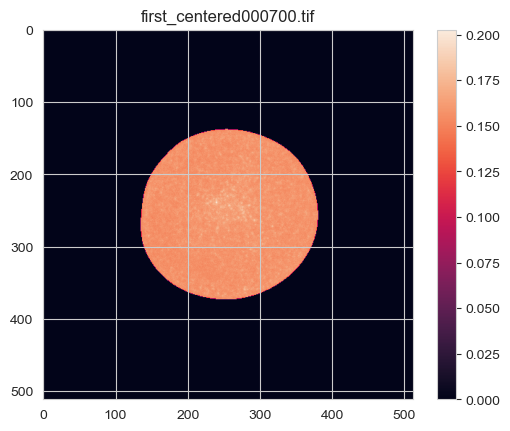

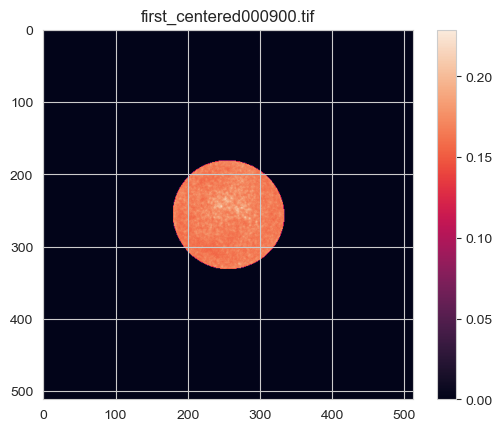

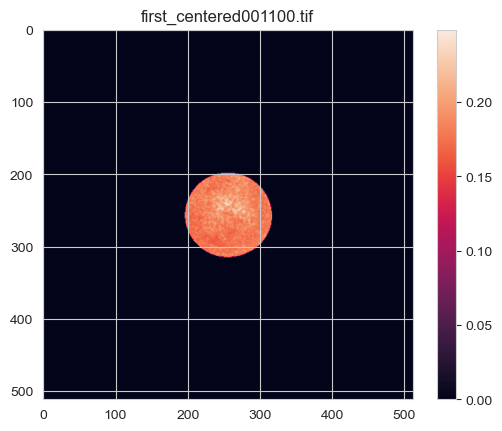

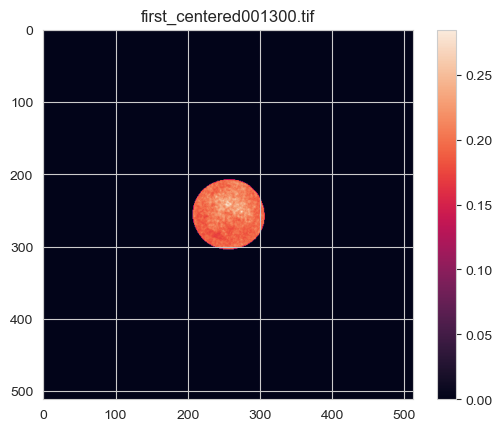

In [28]:
hist_list = []
img_list = []
bins = np.linspace(0,0.4,50)
dir = r'C:\Users\amityu\Gel_Drop_Data\tif_centered'

files = os.listdir(dir)
files= sorted(files)
for file in files[500:1500:200]:
    img = tifffile.imread(os.path.join(dir, file))
    img = img_as_float(img)
    img_list.append(img)
    plt.imshow(img)
    plt.colorbar()
    plt.title(file)
    plt.show()
    hist_list.append(au.histogram_cupy(img[img>0], bins=bins))

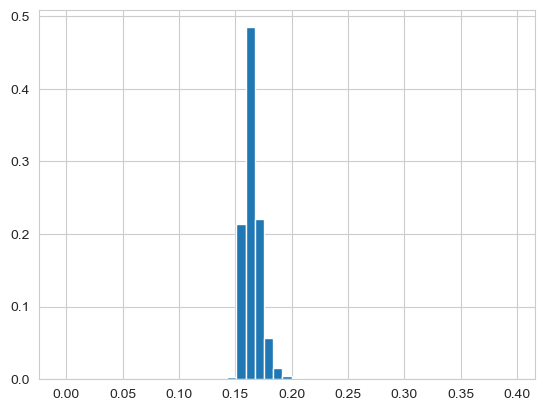

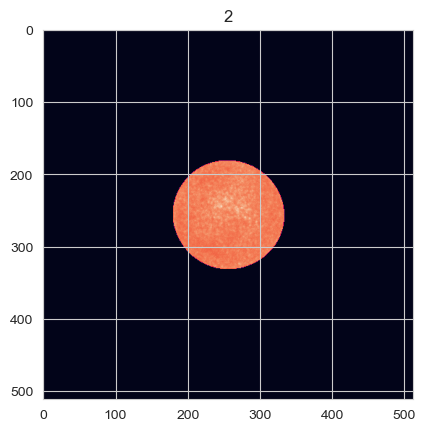

In [40]:
t = 2
img = img_list[t]
hist = hist_list[t][0]
bin_edges = hist_list[t][1]
plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0] )
plt.show()
plt.imshow(img)
plt.title(str(t))
plt.show()


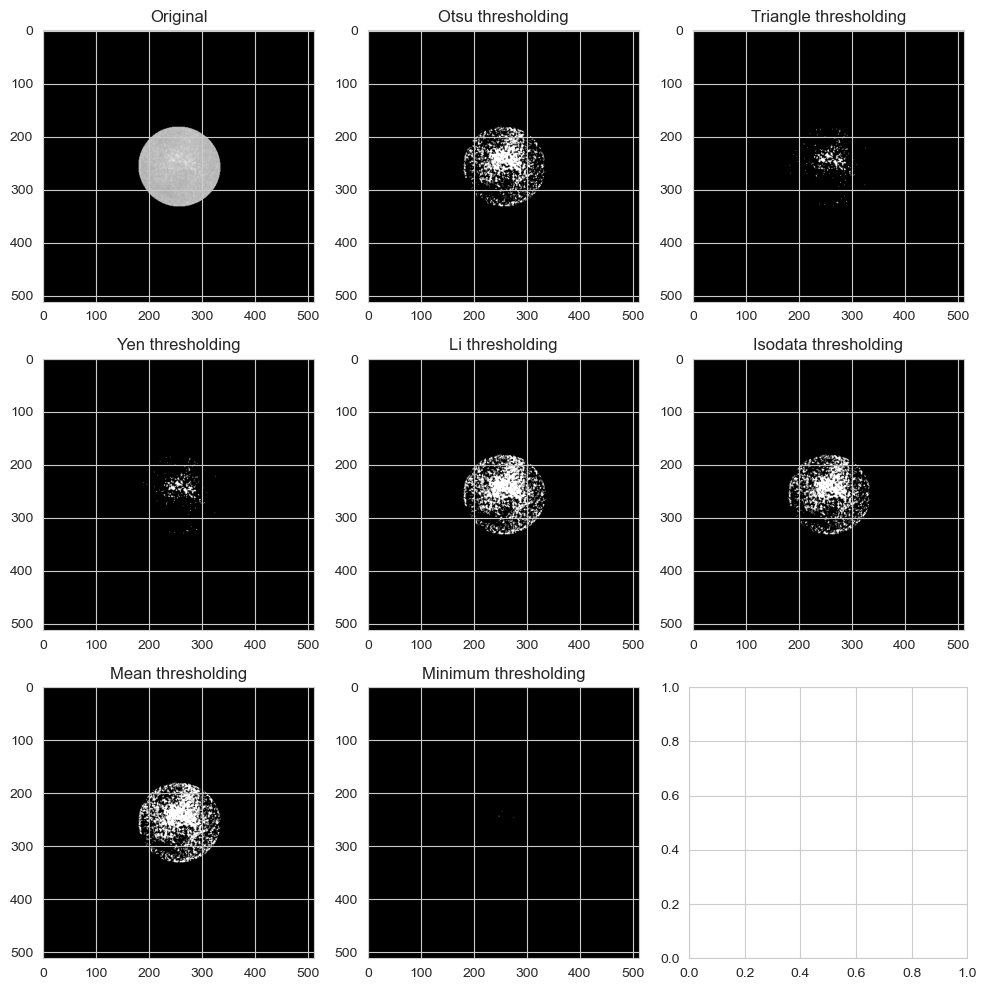

In [41]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_triangle, threshold_yen, threshold_li, threshold_isodata, \
    threshold_mean, threshold_minimum, threshold_multiotsu

image = img
data = img[img>0]
thresh_otsu = threshold_otsu(data)
binary_otsu = image > thresh_otsu

thresh_triangle = threshold_triangle(data)
binary_triangle = image > thresh_triangle

thresh_yen = threshold_yen(data)
binary_yen = image > thresh_yen

thresh_li = threshold_li(data)
binary_li = image > thresh_li

thresh_isodata = threshold_isodata(data)
binary_isodata = image > thresh_isodata

thresh_mean = threshold_mean(data)
binary_mean = image > thresh_mean

thresh_minimum = threshold_minimum(data)
binary_minimum = image > thresh_minimum

#thresh_multiotsu = threshold_multiotsu(image)
#binary_multiotsu = image > thresh_multiotsu

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Otsu thresholding')

ax[2].imshow(binary_triangle, cmap=plt.cm.gray)
ax[2].set_title('Triangle thresholding')

ax[3].imshow(binary_yen, cmap=plt.cm.gray)
ax[3].set_title('Yen thresholding')

ax[4].imshow(binary_li, cmap=plt.cm.gray)
ax[4].set_title('Li thresholding')

ax[5].imshow(binary_isodata, cmap=plt.cm.gray)
ax[5].set_title('Isodata thresholding')

ax[6].imshow(binary_mean, cmap=plt.cm.gray)
ax[6].set_title('Mean thresholding')

ax[7].imshow(binary_minimum, cmap=plt.cm.gray)
ax[7].set_title('Minimum thresholding')

#ax[8].imshow(binary_multiotsu, cmap=plt.cm.gray)
#ax[8].set_title('Multiotsu thresholding')

plt.tight_layout()
plt.show()

In [63]:
def remove_disc(_img, r =20, value = 0):
    
    _img = _img.copy()
    # Define the center and radius of the disk
    center = (img.shape[0]//2, image.shape[1]//2)
    
    # Create index arrays to img
    x = np.arange(0, img.shape[1])
    y = np.arange(0, img.shape[0])

    # Create boolean mask with disk pixel positions set to True
    mask = (x[np.newaxis, :] - center[0]) ** 2 + (y[:, np.newaxis] - center[1]) ** 2 < r ** 2

    # Apply mask to the image
    _img[mask] = value  # or whatever value you wish to set inside the mask
    return _img



In [182]:
dir = r'C:\Users\amityu\Gel_Drop_Data\tif_centered'
#output_dir_otsu = r'C:\Users\amityu\Gel_Drop_Data\otsu'
output_dir_li = r'C:\Users\amityu\Gel_Drop_Data\175_950_ex1'
output_dir = r'C:\Users\amityu\Gel_Drop_Data\175_950_ex1_gray\\'
files = os.listdir(dir)
files= sorted(files)
files = files[175:950]

In [150]:
for file in tqdm(files):
    img = tifffile.imread(os.path.join(dir, file))
    
    gaussian_sigma =3
    img = gaussian(img, sigma = gaussian_sigma)

    #img = img_as_float(img)
    #image = img
    #data = img[img>0]
    #thresh_otsu = threshold_otsu(data)
    #binary_otsu = image > thresh_otsu
    #thresh_li = threshold_li(data)
    #binary_li = image > thresh_li
    #binary_li = remove_disc(binary_li)
    #tifffile.imwrite(output_dir_li + '/li_' + file, binary_li)
    tifffile.imwrite(os.path.join(output_dir,file), img)
    #tifffile.imwrite(output_dir_otsu + '/otsu_' + file, binary_otsu)
    


  0%|          | 0/775 [00:00<?, ?it/s]

In [236]:
img_list = []
for file in tqdm(files):
    img = tifffile.imread(os.path.join(dir, file))
    #gaussian_sigma =3
    #img = gaussian(img, sigma = gaussian_sigma)
    #img[img<threshold_li(img)] = np.nan
    img_list.append(img)

image_array = np.array(img_list)
    

  0%|          | 0/775 [00:00<?, ?it/s]

In [184]:
t =0 
data = image_array[t].flatten()

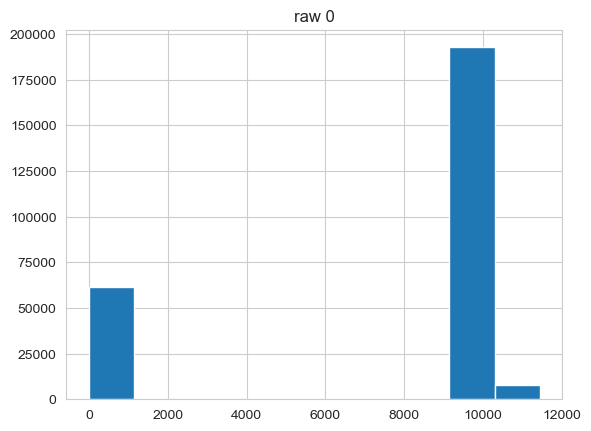

In [185]:
plt.hist(data)
plt.title('raw %d'%t)
plt.show()

In [186]:
#data[data==0] = np.nan
data = data[~np.isnan(data)]
img = image_array[t]
threshold = threshold_otsu(data)
threshold_data = data[data>threshold]
threshold2 = np.percentile(threshold_data, 5)
threshold_data = threshold_data[threshold_data>threshold2]

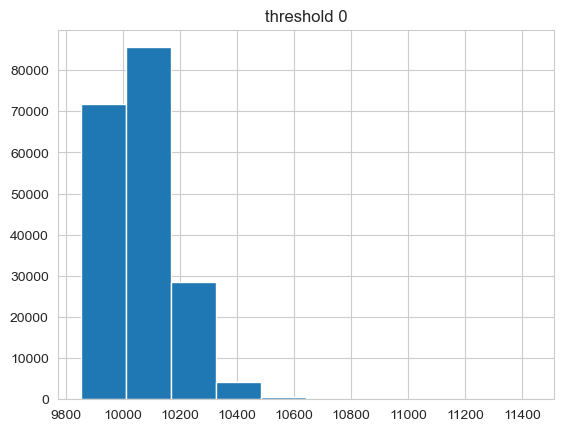

In [187]:
plt.hist(threshold_data)#, bins = np.linspace(0,0.2,100))
plt.title('threshold {}'.format(t))
plt.show()

In [190]:
img= np.clip(img, threshold2, np.percentile(img,99))

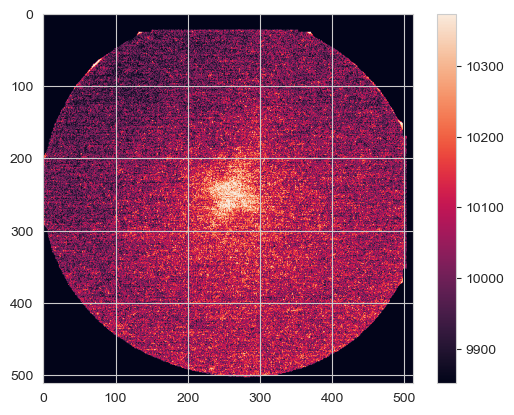

In [191]:
plt.imshow(img)
plt.colorbar()
plt.show()

In [366]:

output_thresh_dir =r'C:\Users\amityu\Gel_Drop_Data\175_950_ex1_local\\'
for i,file in tqdm(enumerate(files)):
    data = image_array[i].flatten()
    data = data[~np.isnan(data)]
    #img = image_array[i]
    '''threshold = threshold_otsu(data)
    threshold_data = data[data > threshold]
    threshold2 = np.percentile(threshold_data, 5)
    img=np.clip(img, threshold2, np.percentile(img, 99))'''
    coordinates = find_local_maxima(image_array[i],6)
    img = paint_indices_cross(image_array[i], coordinates)

#if i% 10 ==0:
    #    plt.imshow(img)
    #    plt.show()
    tifffile.imwrite(os.path.join(output_thresh_dir, file), img)

0it [00:00, ?it/s]

In [ ]:
def paint_indices(img,indices, r =2):
    mask = np.zeros_like(img)

    for t in range(len(indices)):
        for i in range(rows):
            for j in range(cols):
                if np.sqrt((indices[0, t] - i) ** 2 + (indices[1, t] - j) ** 2) <= r:
                    mask[i, j] = 1
    return mask

In [353]:
#import numba
def paint_indices_cross(img,indices):
    mask = np.zeros_like(img)
    indices = np.array(indices)
    for i in range(len(indices)):
        x = int(indices[i,1])
        y = int(indices[i,0])
        mask [max(y-1,0):min(y+2, img.shape[0]), x] = 1
        mask[y,max(x-1,0):min(x+2, img.shape[1])] = 1
    return mask

In [346]:
import numpy as np
import scipy.ndimage as ndimage

def find_local_maxima(_image, min_distance=1):
    # Apply a maximum filter to find local maxima
    neighborhood_size = 2 * min_distance + 1
    local_max = ndimage.maximum_filter(_image, size=neighborhood_size, mode='constant')

    # Compare the original image to the local maxima
    local_maxima = (_image == local_max)

    # Apply a threshold to avoid low-value peaks (optional)
    threshold = np.nanmax(_image) * 0.1
    local_maxima = local_maxima & (_image > threshold)

    # Label the maxima
    labeled, num_objects = ndimage.label(local_maxima)

    # Find the coordinates of the local maxima
    slices = ndimage.find_objects(labeled)
    coordinates = [(int(s[0].start + s[0].stop - 1) // 2, int(s[1].start + s[1].stop - 1) // 2) for s in slices]

    return coordinates



In [364]:
%%time
t = 500
coordinates = find_local_maxima(image_array[t],6)
max_image = paint_indices_cross(image_array[t], coordinates)


CPU times: total: 0 ns
Wall time: 5.32 ms


76


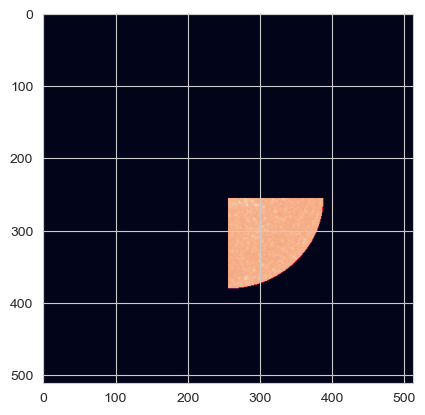

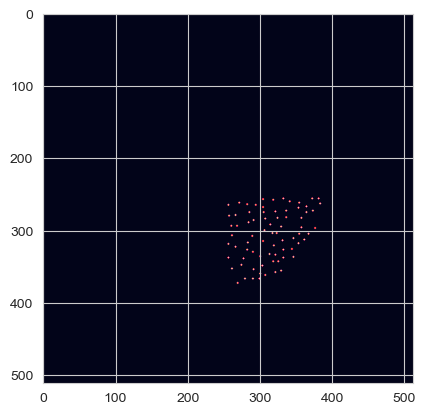

In [365]:
print(len(coordinates))
plt.imshow(image_array[t])
plt.show()
plt.imshow(max_image)
plt.show()

In [209]:
import numba
import numpy as np
import numba


@numba.njit
def create_mask_namba(img, n, r):
    # number of rows and cols in the image
    rows, cols = img.shape

    # flatten the image and get the indices of n highest pixels
    flat_img = img.flatten()
    partitioned = np.argpartition(flat_img, -n)[-n:]

    # unravel flat indices
    n_highest_indices = np.zeros((2, n))

    for idx in range(partitioned.shape[0]):
        n_highest_indices[0, idx] = partitioned[idx] // cols
        n_highest_indices[1, idx] = partitioned[idx] % cols
    
    paint_indices(img,indices)
    # Initialize mask with zeros
    

In [206]:


import numpy as np
from scipy import ndimage

def create_mask(img, n, r):
    # Find the indices of the n highest values in the image
    n_highest_indices = np.unravel_index(np.argpartition(img.ravel(), -n)[-n:], img.shape)

    # Initialize mask with zeros using the same shape as the input image
    mask = np.zeros_like(img)

    # For each of the n highest values, create circular ROI of radius r and update the mask
    for x, y in zip(*n_highest_indices):
        # Create a grid of distance to the current point
        x_grid, y_grid = np.ogrid[-x:img.shape[0] - x, -y:img.shape[1] - y]
        dist = np.sqrt(x_grid ** 2 + y_grid ** 2)  # compute Euclidean distance to the center (x,y)

        # Create binary image of circular ROI
        circular_roi = dist <= r

        # Update the mask with the current circular ROI
        mask = np.maximum(mask, circular_roi)

    return mask

In [282]:

output_thresh_dir =r'C:\Users\amityu\Gel_Drop_Data\175_950_ex1_circles_sqr\\'

for i,file in tqdm(enumerate(files)):
    img = image_array[i]
    img[:img.shape[0]//2,:] = 0
    img[:,:img.shape[1]//2] =0
    output_image= create_mask_namba(img,5000,1)
    #    plt.show()
    tifffile.imwrite(os.path.join(output_thresh_dir, file), output_image)

0it [00:00, ?it/s]

In [223]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [279]:
%%cython --compile-args=-fopenmp --link-args=-fopenmp --force
cimport cython
from cython.parallel import prange
import numpy as np
cimport numpy 
from libc.math cimport sqrt

@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)  # Deactivate negative indexing
def create_mask_cython(numpy.uint16_t [:,:] img, int n, int r):
    cdef int rows = img.shape[0]
    cdef int cols = img.shape[1]
    cdef int [:, :] mask = np.zeros((rows, cols), dtype=np.uint16_t)
    cdef double [:] flat_img = img.flatten()
    cdef double [:] partitioned = np.argpartition(flat_img, -n)[-n:]
    cdef double [:, :] n_highest_indices = np.zeros((2, n))
    cdef int idx, t, i, j
    cdef double dist
            
    for idx in range(partitioned.shape[0]):
        n_highest_indices[0, idx] = partitioned[idx] // cols
        n_highest_indices[1, idx] = partitioned[idx] % cols

    with nogil:
        for t in prange(n, schedule='dynamic'):
            for i in range(rows):
                for j in range(cols):
                    dist = sqrt((n_highest_indices[0, t] - i) ** 2 + (n_highest_indices[1, t] - j) ** 2)
                    if dist <= r:
                        mask[i, j] = 1
    return np.asarray(mask)


Content of stdout:
_cython_magic_f81534e4db12cf858e761dbc517144e3617e42cf.c
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
C:\Users\amityu\.ipython\cython\_cython_magic_f81534e4db12cf858e761dbc517144e3617e42cf.c(19481): warning C4244: '=': conversion from 'Py_ssize_t' to 'int', possible loss of data
C:\Users\amityu\.ipython\cython\_cython_magic_f81534e4db12cf858e761dbc517144e3617e42cf.c(19490): warning C4244: '=': conversion from 'Py_ssize_t' to 'int', possible loss of data
LINK : warning LNK4044: unrecognized option '/fopenmp'; ignored
   Creating library C:\Users\amityu\.ipython\cython\Users\amityu\.ipython\cython\_cython_magic_f81534e4db12cf858e761dbc517144e3617e42cf.cp310-win_amd64.lib and object C:\Users\amityu\.ipython\cython\Users\amityu\.ipython\cython\_cython_magic_f81534e4db12cf858e761dbc517144e3617e42cf.

In [280]:
import tifffile

output_thresh_dir = r"C:\\Users\\amityu\\Gel_Drop_Data\\175_950_ex1_circles\\"

for i, file in enumerate(files):
    img = image_array[i]
    output_image = create_mask_cython(img, 1000, 1)
    tifffile.imwrite(os.path.join(output_thresh_dir, file), output_image)

AttributeError: module 'numpy' has no attribute 'uint16_t'

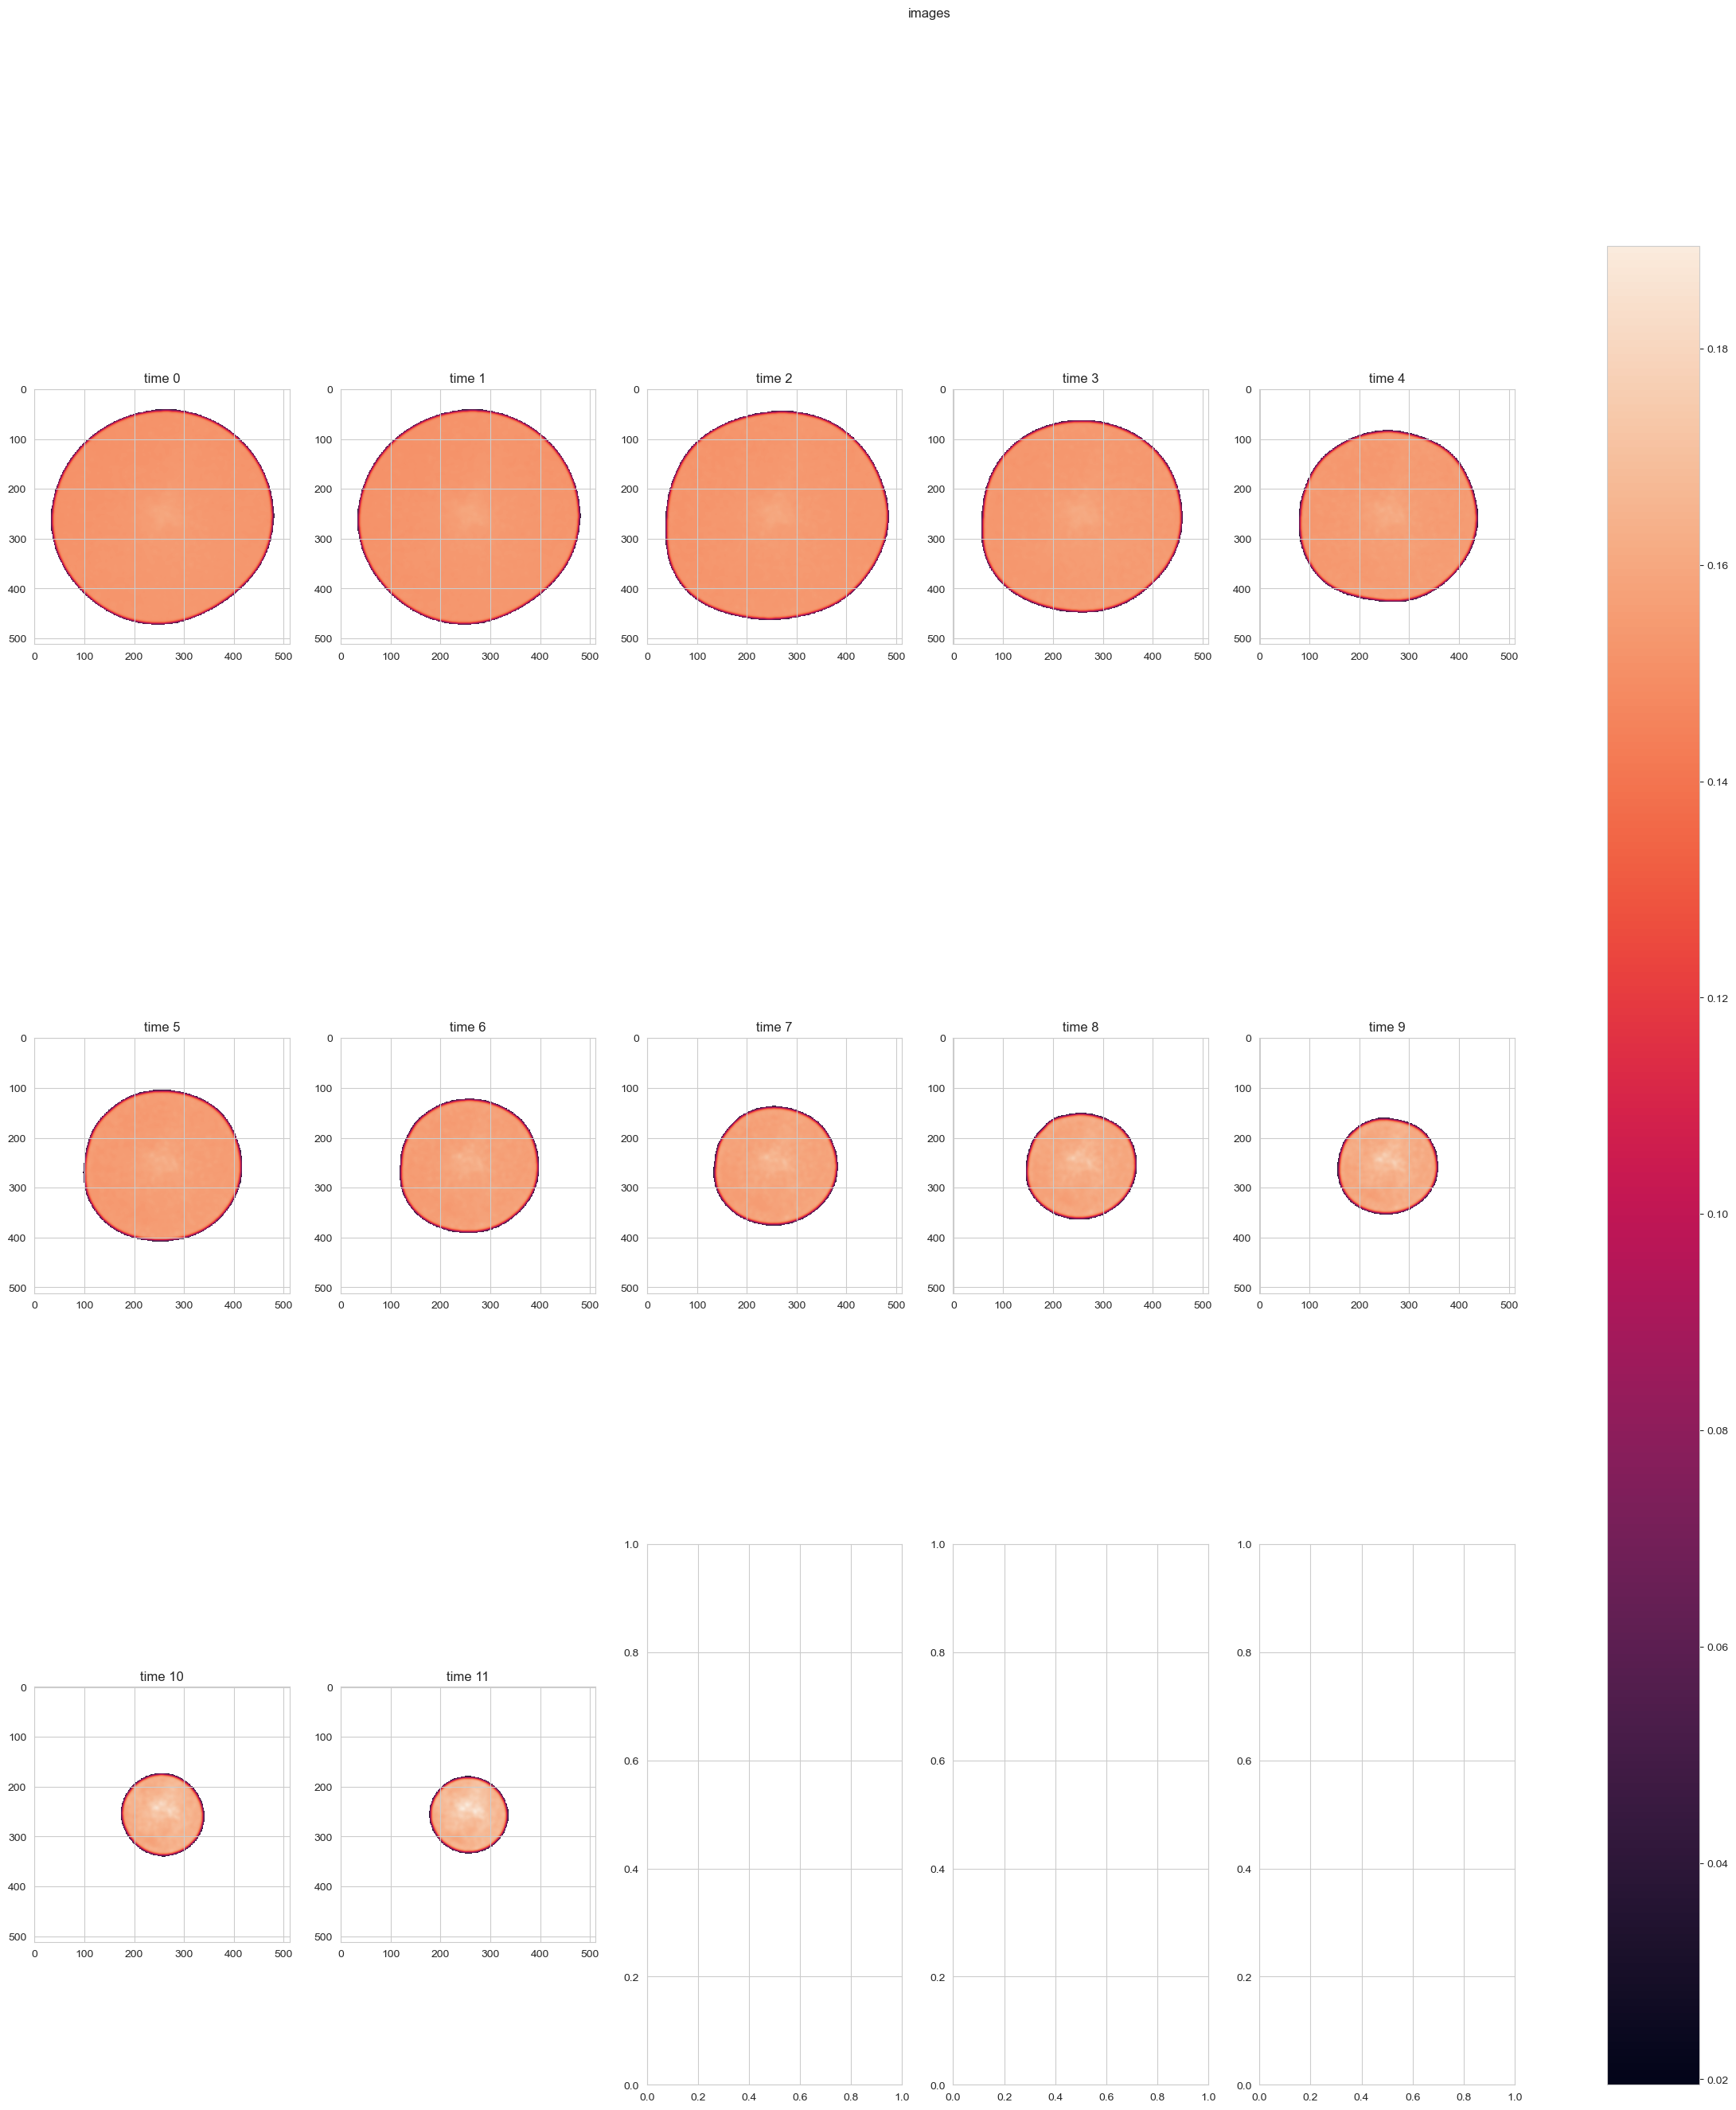

In [99]:
from utils import graph_utils as gu
gu.show_imshow_sequence_with_colorbar(image_array, np.arange(len(image_array)), 'images')

In [199]:
import pandas as pd
t = 488
df = pd.read_csv(r'C:\Users\amityu\Gel_Drop_Data\{}.csv'.format(t))


C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x', ylabel='y'>

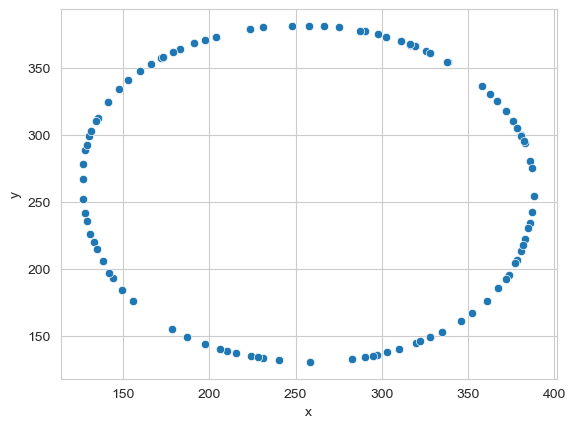

In [200]:
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'xs' and 'ys'
sns.scatterplot(data=df, x='x', y='y')

In [6]:
DATA_PATH = r'C:\Users\amityu\Gel_Drop_Data'
image_folder = os.path.join(DATA_PATH , r'175_950_ex1_clip')
csv_file = os.path.join(DATA_PATH, 'local_spots.csv')
tracking_data = pd.read_csv(csv_file, skiprows=[1,2,3])

In [9]:
import pandas as pd
x0 = 256
y0 = 256
def process_tracks(_df):
    # Group by TRACK_ID
    grouped = _df.groupby('TRACK_ID')

    # Initialize lists to collect results
    track_ids = []
    min_frames = []
    max_frames = []
    min_positions_x = []
    min_positions_y = []
    max_positions_x = []
    max_positions_y = []
    min_angles = []
    max_angles = []

# Iterate over each group
    for track_id, group in grouped:
        min_frame = group['FRAME'].min()
        max_frame = group['FRAME'].max()
        min_frame_row = group[group['FRAME'] == min_frame]
        max_frame_row = group[group['FRAME'] == max_frame]
        min_pos_x = min_frame_row['POSITION_X'].values[0]
        min_pos_y = min_frame_row['POSITION_Y'].values[0]
        max_pos_x = max_frame_row['POSITION_X'].values[0]
        max_pos_y = max_frame_row['POSITION_Y'].values[0]

        min_angle = np.degrees(np.arctan2(min_pos_y - y0, min_pos_x - x0))
        max_angle = np.degrees(np.arctan2(max_pos_y - y0, max_pos_x - x0))

        track_ids.append(track_id)
        min_frames.append(min_frame)
        max_frames.append(max_frame)
        min_positions_x.append(min_pos_x)
        min_positions_y.append(min_pos_y)
        max_positions_x.append(max_pos_x)
        max_positions_y.append(max_pos_y)
        min_angles.append(min_angle)
        max_angles.append(max_angle)

    # Create a new DataFrame with the collected results
    _result_df = pd.DataFrame({
        'TRACK_ID': track_ids,
        'MIN_FRAME': min_frames,
        'MAX_FRAME': max_frames,
        'MIN_POSITION_X': min_positions_x,
        'MIN_POSITION_Y': min_positions_y,
        'MAX_POSITION_X': max_positions_x,
        'MAX_POSITION_Y': max_positions_y,
        'MIN_ANGLE': min_angles,
        'MAX_ANGLE': max_angles
    })

    return _result_df

result_df = process_tracks(tracking_data)
print(result_df)


       TRACK_ID  MIN_FRAME  MAX_FRAME  MIN_POSITION_X  MIN_POSITION_Y  \
0             0          0          2           270.0           357.0   
1             1          0          1           410.0           461.0   
2             2          0          1           402.0           311.0   
3             3          0          4           469.0           346.0   
4             4          0          3           444.0           421.0   
...         ...        ...        ...             ...             ...   
12973     12973        760        761           271.0           295.0   
12974     12974        760        761           276.0           273.0   
12975     12975        757        758           293.0           302.0   
12976     12976        757        758           307.0           284.0   
12977     12977        773        774           285.0           270.0   

       MAX_POSITION_X  MAX_POSITION_Y  MIN_ANGLE  MAX_ANGLE  
0               267.0           352.0  82.108298  83.463366  

C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


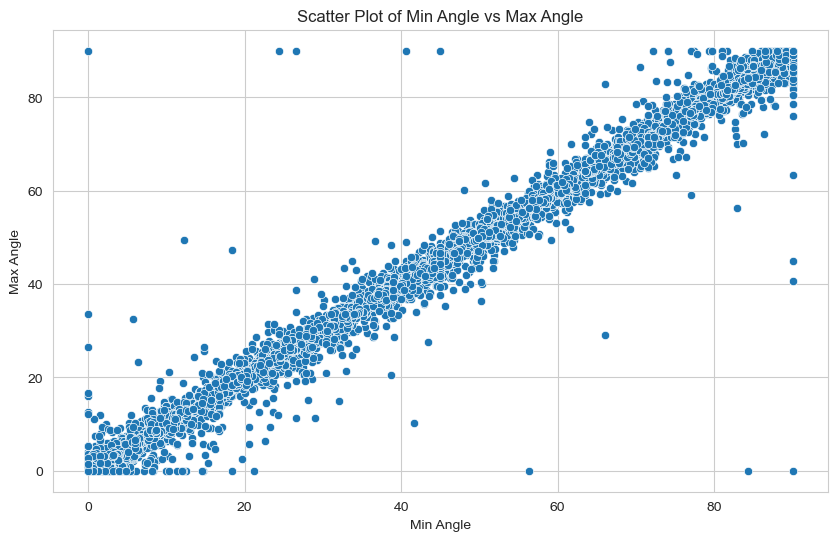

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MIN_ANGLE', y='MAX_ANGLE', data=result_df)
plt.xlabel('Min Angle')
plt.ylabel('Max Angle')
plt.title('Scatter Plot of Min Angle vs Max Angle')
plt.show()